In [9]:
from ipycanvas import Canvas
from ipywidgets import HBox
BLANK = '#FFFFFF'
RED = '#F38D76'
BLUE = '#33D5FF'
PURPLE = '#DFABF8'
GREEN = '#C9F8AB'
BEIGE = '#F8DAAB'
BLACK = '#000000'

root_x = 20
root_y = 50
branch_length = 15
branch_height = 15
blank_block_width = 40
blank_block_height = 10
AD_width = 200

# rectangle_width = 30
# rectangle_height = 15

def add_branch(canvas,start_x,start_y,des_x,des_y):
    path_x = start_x
    path_y = start_y
    canvas.set_line_dash([])
    canvas.begin_path()
    canvas.move_to(path_x, path_y)
    canvas.line_to(path_x, des_y)
    canvas.line_to(des_x, des_y)
    canvas.stroke()

    return des_x,des_y

def add_block(canvas,loc_x,loc_y,width,height,color):
    loc_y = loc_y - (height/2)
    canvas.fill_style = color
    canvas.stroke_style = BLACK
    
    # fill_rect(x, y, width, height=None):
    # stroke_rect(x, y, width, height=None):
    canvas.fill_rect(loc_x,loc_y,width,height)
    canvas.stroke_rect(loc_x,loc_y,width,height)

    return loc_x,(loc_y + height/2)

def elided_branch(canvas,start_x,start_y,des_x,des_y):
    line_dashes = [[2, 2], [10, 5], [5, 10, 20], [10, 20], [20, 10], [20, 20]]

    path_x = start_x
    path_y = start_y
    canvas.set_line_dash([])
    canvas.begin_path()
    canvas.move_to(path_x, path_y)
    canvas.line_to(path_x, des_y)
    canvas.stroke()
    
    canvas.set_line_dash(line_dashes[0])
    canvas.begin_path()
    canvas.move_to(path_x, des_y)
    canvas.line_to(des_x, des_y)
    canvas.stroke()
    
    path_x += (des_x - start_x)/2
    path_y = des_y - 5
    canvas.set_line_dash([])
    canvas.begin_path()
    canvas.move_to(path_x+1,path_y)
    canvas.line_to(path_x-2, path_y + 10)
    canvas.stroke()

    return des_x,des_y



In [2]:
#### Testing Draw AD ####
## Canvaas 1 ##

canvas1 = Canvas(width=250, height=250)
coord_x = root_x
coord_y = root_y

# Level1 - Branch 1
coord_x,coord_y = add_branch(canvas1,root_x,root_y,coord_x + 10,coord_y)
block_x,block_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height)
block_x,block_y = add_block(canvas1,block_x,block_y,blank_block_width,blank_block_height,BLANK)

# Level1 - Branch 2
coord_x,coord_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height)

# Level2 - Branch 1
block_x,block_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height)
block_x,block_y = add_block(canvas1,block_x,block_y,blank_block_width,blank_block_height,BLANK)

# Level2 - Branch 2
coord_x,coord_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height)

# Level3 - Branch 1
block_x,block_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height)
block_x,block_y = add_block(canvas1,block_x,block_y,blank_block_width,blank_block_height,BLANK)

# Level3 - Branch2
# Additional Height = 20
coord_x,coord_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height + 20)

#Level4 - Branch1
block_x,block_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height - 10)
block_x,block_y = add_block(canvas1,block_x,block_y,AD_width - block_x,blank_block_height + 20,RED)

# Level4 - Branch2
coord_x,coord_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height + 20)

# Level5 - Branch2
lev5_x,lev5_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height + 20)

# Level5 - Branch1
coord_x,coord_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height- 5)
block_x,block_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height)

# Level6 - Branch1
block_x,block_y = add_block(canvas1,block_x,block_y,blank_block_width,blank_block_height,BLANK)

# Level6 - Branch2
block_x,block_y = add_branch(canvas1,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height)
block_x,block_y = add_block(canvas1,block_x,block_y,AD_width - block_x,blank_block_height + 20,BLUE)

# Level6 - Branch3
block_x,block_y = add_block(canvas1,lev5_x,lev5_y,AD_width - lev5_x,blank_block_height + 20,PURPLE)


In [4]:
#### Testing Draw AD ####
## Canvaas 2 ##

canvas2 = Canvas(width=250, height=250)

coord_x = root_x
coord_y = root_y

# Level1 - Branch 1
coord_x,coord_y = add_branch(canvas2,root_x,root_y,coord_x + 10,coord_y)
block_x,block_y = add_branch(canvas2,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height)
block_x,block_y = add_block(canvas2,block_x,block_y,blank_block_width,blank_block_height,BLANK)

# Level1 - Branch 2
coord_x,coord_y = elided_branch(canvas2,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height + 10)

# Level2 - Branch 1
block_x,block_y = add_branch(canvas2,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height)
block_x,block_y = add_block(canvas2,block_x,block_y,AD_width - block_x,blank_block_height + 10,RED)

# Level2 - Branch2
# Additional Height = 20
coord_x,coord_y = add_branch(canvas2,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height + 20)

# Level3 - Branch 1
block_x,block_y = add_branch(canvas2,coord_x,coord_y,coord_x + branch_length, coord_y - branch_height - 10)
block_x,block_y = add_block(canvas2,block_x,block_y,AD_width - block_x,blank_block_height + 10,GREEN)

# Level3 - Branch2
# Additional Height = 20
block_x,block_y = add_branch(canvas2,coord_x,coord_y,coord_x + branch_length, coord_y + branch_height + 20)
block_x,block_y = add_block(canvas2,block_x,block_y,AD_width - block_x,blank_block_height + 70,BEIGE)

#level3 - Branch2 - nesting clade
block_x,block_y = elided_branch(canvas2,block_x,block_y,block_x + branch_length, block_y + 2)
block_x,block_y = add_block(canvas2,block_x,block_y,AD_width - block_x - 10,blank_block_height + 20,PURPLE)


In [5]:
sprites = [canvas1, canvas2]
HBox(sprites)

In [3]:
from ipycanvas import Canvas
canvas = Canvas(height=800, width=1200)
canvas.scale(1.0, 1.0)
canvas.fill_rect(0,0,1100,1100)
canvas.fill_style = RED
width = 135
height = 150
x = 20
canvas.fill_rect(x,20,width,height)

canvas.fill_style = BLUE
canvas.fill_rect(30,30,40,15)
canvas.fill_rect(30,50,20,15)
canvas.fill_style = RED
x += width + 20
canvas.fill_rect(x,20,width,height)
x += width + 20
canvas.fill_rect(x,20,width,height)
x += width + 20
canvas.fill_rect(x,20,width,height)
x += width + 20
canvas.fill_rect(x,20,width,height)
x += width + 20
canvas.fill_rect(x,20,width,height)
x += width + 20
canvas.fill_rect(x,20,width,height)


canvas

Canvas(height=800, width=1200)

In [9]:
from ipycanvas import Canvas
canvas = Canvas(width=200, height=200)
line_dashes = [[2, 2], [5, 5], [8, 8], [10, 10]]

canvas.fill_style = RED
canvas.set_line_dash(line_dashes[1])
canvas.begin_path()
canvas.move_to(10,10)
canvas.line_to(80,10)
canvas.stroke()

canvas


Canvas(height=200, width=200)

In [2]:
import asyncio
from ipycanvas import Canvas, hold_canvas

class Tree:
    def __init__(self):
        self.canvas = Canvas(width=400, height=30)
        
    async def draw_ad(self):
        pass
    
    async def draw_with_rate_control(self, ad_list, canvas, batch_size=10, rate_limit=0.1):
        total_trees = len(ad_list)
        completed_trees = 0
    
        for i in range(0, total_trees, batch_size):
            batch = ad_list[i:i+batch_size] 
    
            tasks = [self.draw_ad() for _ in range(len(batch))]
            await asyncio.gather(*tasks)
    
            completed_trees += len(batch)
    
            progress = completed_trees / total_trees
    
            with hold_canvas(canvas):
                canvas.clear_rect(0, 0, canvas.width, canvas.height)
                canvas.fill_style = 'lightgray'
                canvas.fill_rect(0, 0, 200, 50)
                canvas.fill_style = 'blue'
                canvas.fill_rect(0, 0, int(progress * 200), 50)
                canvas.fill_style = 'black'
                canvas.font = '16px Arial'
                canvas.fill_text(f'Progress: {int(progress * 100)}%', 10, 20)
    
            await asyncio.sleep(rate_limit)

tree = Tree()
asyncio.create_task(tree.draw_with_rate_control(ad_list, tree.canvas, batch_size=1, rate_limit=0.1))
tree.canvas


NameError: name 'ad_list' is not defined

In [5]:
from ipycanvas import Canvas

canvas = Canvas(width=700, height=50)

def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')
    return tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))

def rgb_to_hex(rgb_color):
    return '#{:02x}{:02x}{:02x}'.format(*rgb_color)

def lighten_color(hex_color, amount):
    rgb_color = hex_to_rgb(hex_color)
    lightened_rgb = tuple(min(255, c + amount) for c in rgb_color)
    return rgb_to_hex(lightened_rgb)

initial_color_hex = RED

lightened_color_hex = lighten_color(initial_color_hex, 10)

print("color code:", lightened_color_hex)


gradient = canvas.create_linear_gradient(
    0,
    0, 
    350,
    0, 
    [
        (0,RED),
        (0.2,RED),
        (0.2, lightened_color_hex),
        (0.4, lightened_color_hex),
        (0.6, "white"),
    ],
)

canvas.fill_style = gradient
canvas.fill_rect(0, 0, 350, 50)

display(canvas)


color code: #fd9780


Canvas(height=50)

In [62]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.7 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b778


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[[4.90699100e-01 2.09002478e-01 9.70806869e-01 ... 4.64036983e-01
  2.13625803e-01 2.95546518e-01]
 [7.64638936e-01 9.99588826e-01 1.39479706e-01 ... 7.73323956e-01
  2.08420985e-02 8.50556471e-01]
 [7.17296291e-01 9.89493399e-01 5.45403350e-02 ... 4.49396729e-04
  1.76451342e-01 8.98396343e-02]
 ...
 [1.68748698e-01 5.68074490e-01 6.16281757e-03 ... 9.51290775e-01
  1.53999098e-02 7.03343398e-01]
 [2.15422103e-01 4.09883660e-03 1.62769826e-01 ... 6.56735886e-02
  4.63622277e-01 9.23886176e-01]
 [7.98178700e-01 8.97950254e-01 4.67696660e-01 ... 6.84487070e-01
  2.46128664e-01 1.73153027e-01]]
[[0.4906991  0.48682071 0.84405158 ... 0.31639284 0.21452395 0.54686261]
 [0.48682071 0.99958883 0.56448655 ... 0.67069922 0.01247047 0.87425336]
 [0.84405158 0.56448655 0.05454033 ... 0.00330611 0.16961058 0.27876815]
 ...
 [0.31639284 0.67069922 0.00330611 ... 0.95129078 0.04053675 0.69391523]
 [0.21452395 0.01247047 0.16961058 ... 0.04053675 0.46362228 0.58500742]
 [0.54686261 0.87425336 0.2787

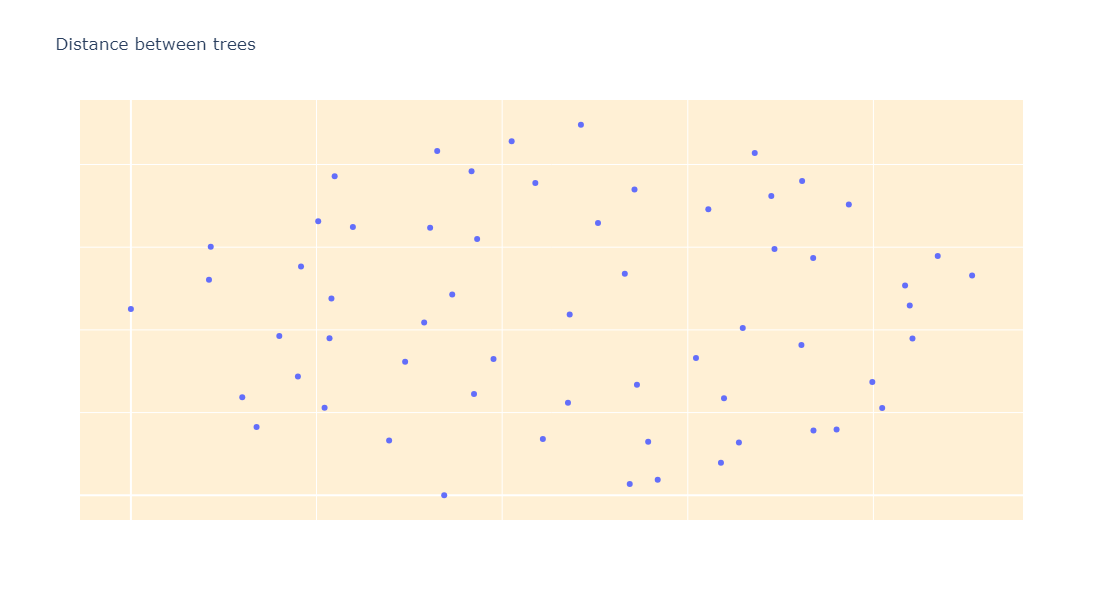

In [48]:
# Testing code for tree distance

import plotly.graph_objects as go
from sklearn.manifold import MDS
import numpy as np

BG = '#FFF0D5'
# 1. random distance matrix → rf_distance between tree
points_id = ['Point ' + str(i) for i in range(1, 61)]
num_points = len(points_id)
distances = np.random.rand(num_points, num_points)
distances = (distances + distances.T) / 2 
np.fill_diagonal(distances, 0)

# 2. MDS to calculate coordinates according the distance precomputed
mds = MDS(n_components=2, dissimilarity='precomputed')
coordinates = mds.fit_transform(distances)

coordinates -= coordinates.min(axis=0)

# 3. Plot out all point with coordinate
fig = go.Figure() 

# mode : text+markers / lines
hover_text = [f'ID: {points_id[i]}' for i in range(num_points)]
fig.add_trace(go.Scatter(x=coordinates[:, 0], y=coordinates[:, 1], mode='markers', name='Distance',hoverinfo='text',text=hover_text))
fig.update_layout(dragmode=False)
fig.update_layout(title='Distance between trees',plot_bgcolor=BG,width=800, height=600,xaxis=dict(color=BLANK),yaxis=dict(color=BLANK))

fig.show()
